<a href="https://colab.research.google.com/github/Roshan-234/ML-Projects/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


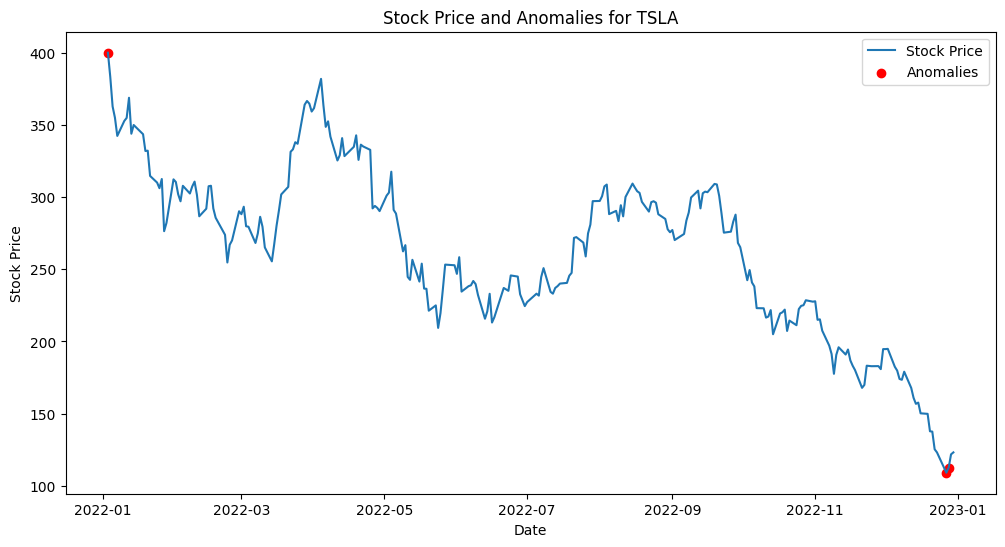

In [4]:
import yfinance as yf
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Function to fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Function to detect anomalies using Isolation Forest
def detect_anomalies(data, contamination=0.01):
    model = IsolationForest(contamination=contamination)
    model.fit(data.values.reshape(-1, 1))
    anomalies = model.predict(data.values.reshape(-1, 1))
    return anomalies



In [9]:
# Stock ticker and date range
ticker_symbol = 'AMD'
start_date = '2023-01-01'
end_date = '2023-07-22'



[*********************100%***********************]  1 of 1 completed


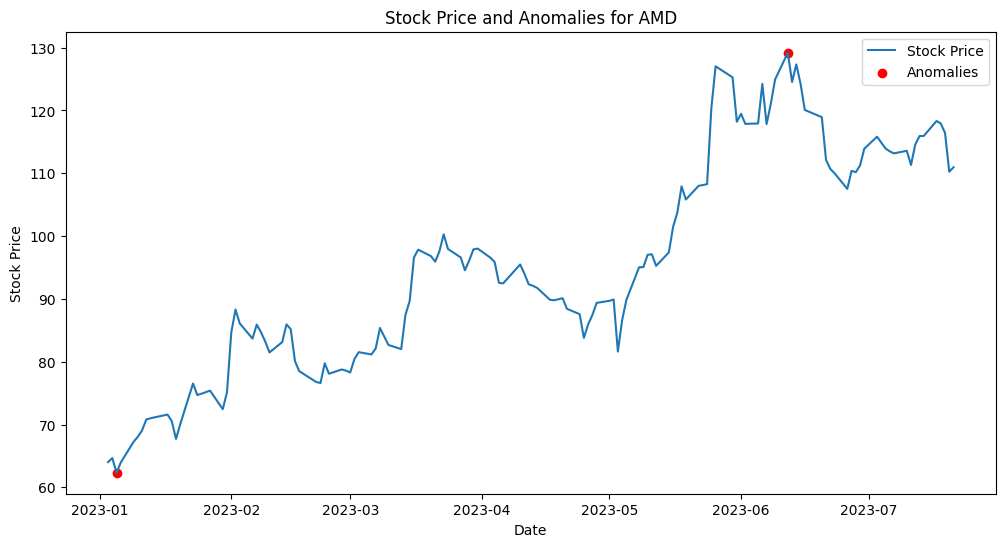

In [10]:
# Fetch historical stock data
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Detect anomalies with 1% contamination (adjust this value as needed)
anomalies = detect_anomalies(stock_data, contamination=0.01)

# Visualize the stock prices with anomalies
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data, label='Stock Price')
plt.scatter(stock_data.index[anomalies == -1], stock_data[anomalies == -1], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price and Anomalies for {ticker_symbol}')
plt.legend()
plt.show()
